## Run on Colab
You can run this notebook on Colab right away without installing JAX dependencies: https://colab.research.google.com/github/willwhitney/reprieve/blob/master/examples/example.ipynb.

## Run locally
To run this notebook locally please install the [Reprieve dependencies](https://github.com/willwhitney/reprieve#dependencies), in particular JAX with GPU support.

In [2]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("xontoloyo/data-penjualan-zara")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'data-penjualan-zara' dataset.
Path to dataset files: /kaggle/input/data-penjualan-zara


In [14]:
file_path=path+"/zara.csv"
df = pd.read_csv(file_path, delimiter=';')
print(df.head())

   Product ID Product Position Promotion Product Category Seasonal  \
0      185102            Aisle        No         Clothing       No   
1      188771            Aisle        No         Clothing       No   
2      180176          End-cap       Yes         Clothing      Yes   
3      112917            Aisle       Yes         Clothing      Yes   
4      192936          End-cap        No         Clothing      Yes   

   Sales Volume brand                                                url  \
0          2823  Zara  https://www.zara.com/us/en/basic-puffer-jacket...   
1           654  Zara  https://www.zara.com/us/en/tuxedo-jacket-p0889...   
2          2220  Zara  https://www.zara.com/us/en/slim-fit-suit-jacke...   
3          1568  Zara  https://www.zara.com/us/en/stretch-suit-jacket...   
4          2942  Zara  https://www.zara.com/us/en/double-faced-jacket...   

                sku                  name  \
0   272145190-250-2   BASIC PUFFER JACKET   
1  324052738-800-46         TUXE

In [10]:
import os
print(os.listdir(path))

['zara.csv']


In [26]:
print("Багандар:",df.columns)

Багандар: Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'sku', 'name',
       'description', 'price', 'currency', 'scraped_at', 'terms', 'section',
       'Total_Sales'],
      dtype='object')


In [25]:
# Жалпы сатылымды есептеу: Sales Volume × price
df["Total_Sales"] = df["Sales Volume"] * df["price"]

# Енді ғана GROUP BY жасауға болады
sales_by_category = df.groupby("Product Category")["Total_Sales"].sum().reset_index()
print(sales_by_category.head())


  Product Category  Total_Sales
0         Clothing  38988476.48


In [27]:
pivot_promo_price = df.pivot_table(values="price",
                                   index="Promotion",
                                   columns="Seasonal",
                                   aggfunc="mean")


In [28]:
brand_counts = df["brand"].value_counts().reset_index()
brand_counts.columns = ["brand", "count"]


In [29]:
sns.set_style("whitegrid")


/tmp/ipython-input-2725081800.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product Category", y="Total_Sales", data=sales_by_category, palette="viridis")


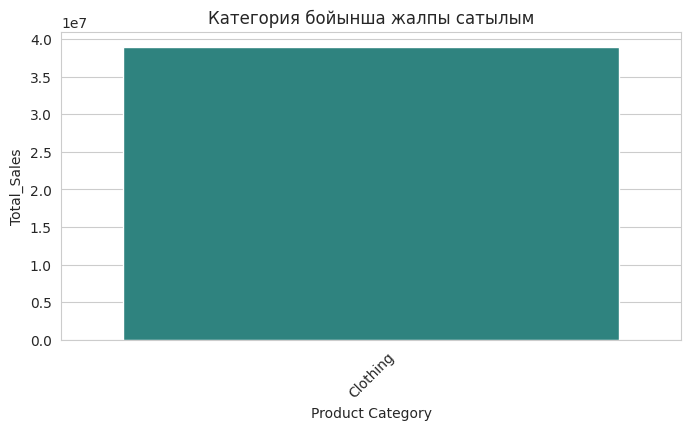

In [30]:
plt.figure(figsize=(8, 4))
sns.barplot(x="Product Category", y="Total_Sales", data=sales_by_category, palette="viridis")
plt.title("Категория бойынша жалпы сатылым")
plt.xticks(rotation=45)
plt.show()

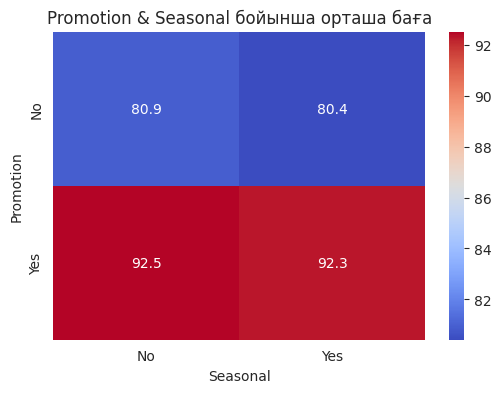

In [32]:
plt.figure(figsize=(6,4))
sns.heatmap(pivot_promo_price, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Promotion & Seasonal бойынша орташа баға")
plt.show()


/tmp/ipython-input-1786164279.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="brand", y="count", data=top_brands, palette="magma")


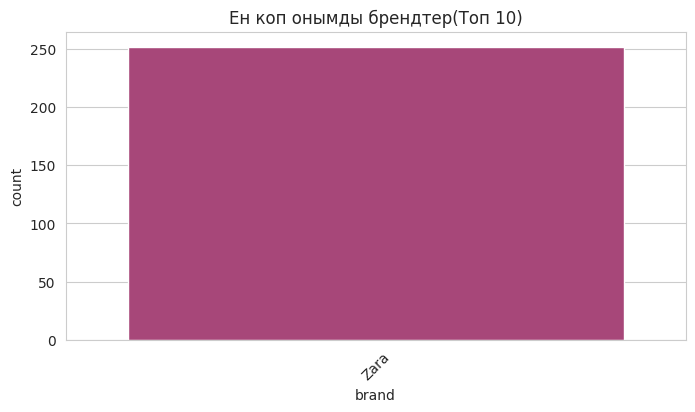

In [33]:
top_brands = brand_counts.head(10,)
plt.figure(figsize=(8, 4))
sns.barplot(x="brand", y="count", data=top_brands, palette="magma")
plt.title("Ен коп онымды брендтер(Топ 10)")
plt.xticks(rotation=45)
plt.show()


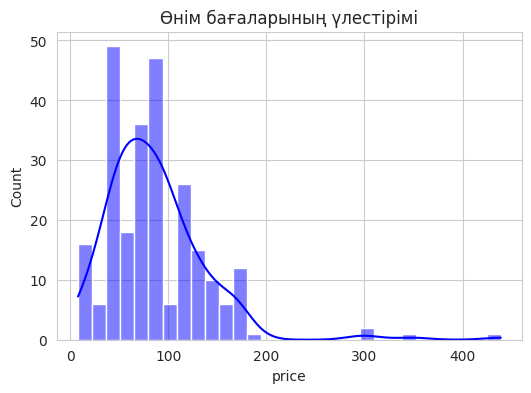

In [35]:
plt.figure(figsize=(6,4))
sns.histplot(df["price"], bins=30, kde=True, color="blue")
plt.title("Өнім бағаларының үлестірімі")
plt.show()